https://github.com/cdt15/lingam
    
Check references if using!!

In [1]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(0)

['1.18.4', '1.0.3', '0.14', '1.2.1']


In [2]:
x3 = np.random.uniform(size=10000)
x0 = 3.0*x3 + np.random.uniform(size=10000)
x2 = 6.0*x3 + np.random.uniform(size=10000)
x1 = 3.0*x0 + 2.0*x2 + np.random.uniform(size=10000)
x5 = 4.0*x0 + np.random.uniform(size=10000)
x4 = 8.0*x0 - 1.0*x2 + np.random.uniform(size=10000)
X = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])
X.head()

,x0,x1,x2,x3,x4,x5
0,2.394708,15.312359,3.685054,0.548814,15.780259,9.948090
1,2.325771,16.145216,4.332293,0.715189,14.335879,9.514409
2,2.197313,15.848718,4.539881,0.602763,14.027410,9.266158
3,1.672250,13.200354,3.675534,0.544883,10.421554,6.771233
4,1.282752,11.337503,3.486211,0.423655,7.533376,5.368668


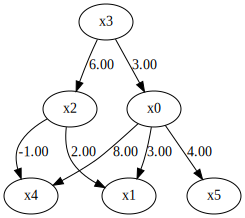

In [4]:

m = np.array([[0.0, 0.0, 0.0, 3.0, 0.0, 0.0],
              [3.0, 0.0, 2.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 6.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [8.0, 0.0,-1.0, 0.0, 0.0, 0.0],
              [4.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

make_dot(m)

In [5]:
model = lingam.DirectLiNGAM()
model.fit(X)

In [6]:
model.causal_order_

[3, 0, 2, 5, 1, 4]

In [7]:
model.adjacency_matrix_

array([[ 0.   ,  0.   ,  0.   ,  3.006,  0.   ,  0.   ],
       [ 3.002,  0.   ,  1.996,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  6.001,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 7.978,  0.   , -0.988,  0.   ,  0.   ,  0.   ],
       [ 3.998,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ]])

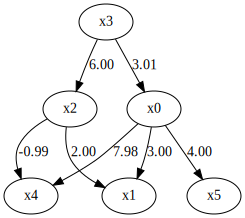

In [8]:
make_dot(model.adjacency_matrix_)